In [1]:
# Include libraries which may use in implementation
import numpy as np
import random
import math
import pickle
import json
from sklearn.utils import shuffle
import glob
import cv2 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

### Loading Dataset

In [2]:
def loadDataset(path):
    print('Loading Dataset...')
    train_x, train_y, test_x, test_y = [], [], [], []
    for i in range(10):
        for filename in glob.glob(path + '\\train\\' + str(i)+'\\*.png'):
            im = cv2.imread(filename,0) #reading in greyscale
            train_x.append(im)
            train_y.append(i)
    for i in range(10):
        for filename in glob.glob(path + '\\test\\' + str(i)+'\\*.png'):
            im=cv2.imread(filename,0)
            test_x.append(im)
            test_y.append(i)
    print('Dataset loaded...')
    return np.array(train_x), np.array(train_y), np.array(test_x),np.array(test_y)

In [3]:
def Encode(l):
    no_of_classes = 10
    c = np.arange(no_of_classes)
    one_hot = (c == l).astype(np.int)
    return one_hot

In [4]:
path = 'D:\study material\MSDS-ITU\semester2\DL\Assignments\Assignment2\Task3_Data'
train_set_x, train_set_y, test_set_x, test_set_y = loadDataset (path)

Loading Dataset...
Dataset loaded...


In [5]:
print( "train_set_x.shape : ",train_set_x.shape ,"\n train_set_y.shape: ", train_set_y.shape,"\n test_set_x.shape: ", test_set_x.shape, "\n  test_set_y.shape :",test_set_y.shape, "\n")

train_set_x.shape :  (60000, 28, 28) 
 train_set_y.shape:  (60000,) 
 test_set_x.shape:  (10000, 28, 28) 
  test_set_y.shape : (10000,) 



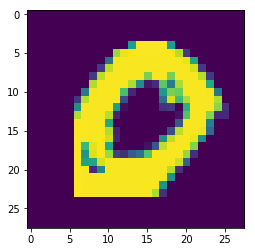

In [6]:
plt.imshow(train_set_x[25])

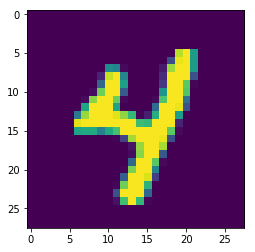

In [7]:
plt.imshow(train_set_x[25000])

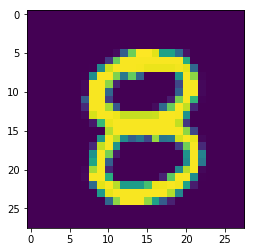

In [10]:
plt.imshow(train_set_x[52000])

In [5]:
#Converting into our required dimensions given in pdf
train_set_y=np.expand_dims(train_set_y, axis=1)
test_set_y = np.expand_dims(test_set_y, axis=1)
# train_set_x=np.expand_dims(train_set_x, axis=3)
# test_set_x = np.expand_dims(test_set_x, axis=3)
print( "train_set_x.shape : ",train_set_x.shape ,"\n train_set_y.shape: ", train_set_y.shape,"\n test_set_x.shape: ", test_set_x.shape, "\n  test_set_y.shape :",test_set_y.shape, "\n")

train_set_x.shape :  (60000, 28, 28) 
 train_set_y.shape:  (60000, 1) 
 test_set_x.shape:  (10000, 28, 28) 
  test_set_y.shape : (10000, 1) 



### Filters

In [6]:
import scipy.io
#loading data from a mat file
data = scipy.io.loadmat('filters.mat')
filters = data['filters']
filters = np.array(filters)
print(filters.shape)

(17, 17, 36)


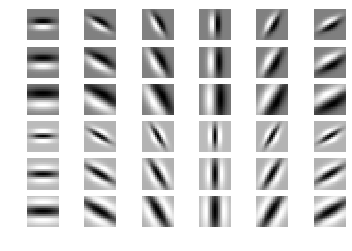

In [22]:
def plotFilters(depth, data):
    for i in range(depth):
        plt.subplot(6,6,i+1)
        plt.axis('off')
        plt.imshow(data[:,:,i], cmap = 'gray')

plotFilters(filters.shape[2], filters)

### Single Step convolution

In [14]:
def conv_single_step(img_patch, _filter):
    return np.sum(np.multiply(img_patch,_filter))

### Convolution

In [15]:
def conv_forward(img, filters, stride=1, pad=0):
    nHPrev = img.shape[0] #row
    nWPrev = img.shape[1] #col
    f = filters.shape[0] #17 X 17
    
    nH=int((nHPrev - f + 2*pad)/stride)+1
    nW=int((nWPrev - f + 2*pad)/stride)+1 
    nD=filters.shape[2] # number of filters
    
    output = np.zeros([nH,nW,nD])
    
    for h in range(nH):
        for w in range(nW):
            for d in range(nD):
                vert_start = h*stride
                vert_end = h*stride + f
                horiz_start = w*stride 
                horiz_end = w*stride + f
                
                img_patch = img[vert_start:vert_end, horiz_start:horiz_end]
                output[h,w,d] = conv_single_step(img_patch, filters[:,:,d])
#     print("output.shape >> ",output.shape)
    return output

### Pooling

In [27]:
def pool_forward(feature_map, mode = "max", filter_size=2, stride=2):
    nHPrev = feature_map.shape[0] #row
    nWPrev = feature_map.shape[1] #col
    
    nH=int((nHPrev - filter_size)/stride)+1
    nW=int((nWPrev - filter_size)/stride)+1 
    nD=feature_map.shape[2] # depth
    
    output = np.zeros([nH,nW,nD])
    
    for h in range(nH):
        for w in range(nW):
            for d in range(nD):
                vert_start = h*stride
                vert_end = h*stride + filter_size
                horiz_start = w*stride 
                horiz_end = w*stride + filter_size
                
                img_patch = feature_map[vert_start:vert_end, horiz_start:horiz_end]
                if mode == "max":
                    output[h,w,d] = np.max(img_patch)#conv_single_step(img_patch, filters[:,:,d])
#     print("output.shape >> ",output.shape)
    return output

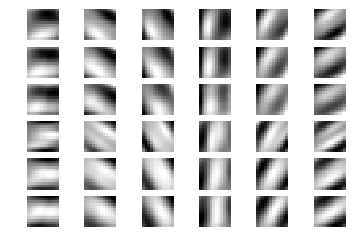

In [35]:
feature_map = conv_forward(train_set_x[25],filters,1,0)
plotFilters(feature_map.shape[2],feature_map)

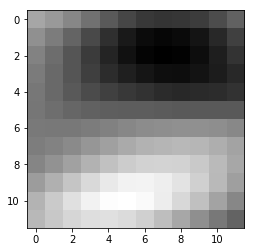

In [36]:
#checking 0th index alone
plt.imshow(feature_map[:,:,0], cmap = 'gray')

after pooling


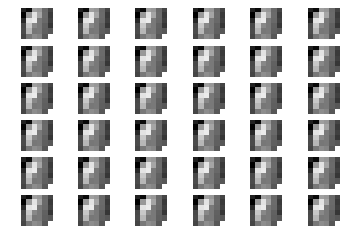

In [37]:
print("after pooling")
pooled_feature_map = pool_forward(feature_map,"max",2, 2)
plotFilters(pooled_feature_map.shape[2],pooled_feature_map)

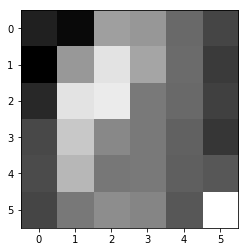

In [38]:
#checking 0th index alone
plt.imshow(pooled_feature_map[:,:,0], cmap = 'gray')

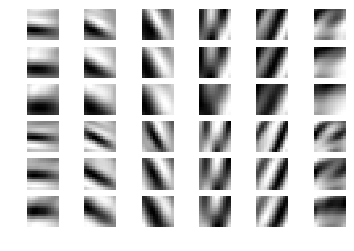

In [39]:
feature_map = conv_forward(train_set_x[25000],filters,1,0)
plotFilters(feature_map.shape[2],feature_map)

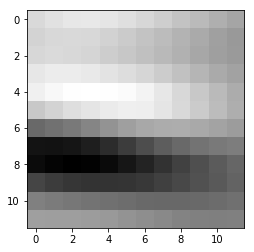

In [40]:
#checking 0th index alone
plt.imshow(feature_map[:,:,0], cmap = 'gray')

after pooling


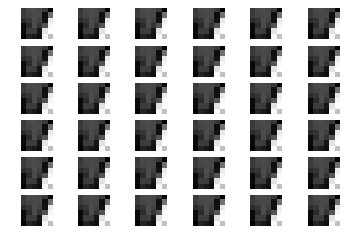

In [41]:
print("after pooling")
pooled_feature_map = pool_forward(feature_map,"max",2, 2)
plotFilters(pooled_feature_map.shape[2],pooled_feature_map)

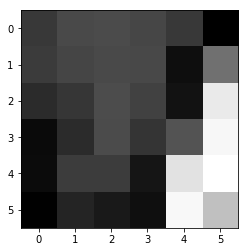

In [42]:
#checking 0th index alone
plt.imshow(pooled_feature_map[:,:,0], cmap = 'gray')

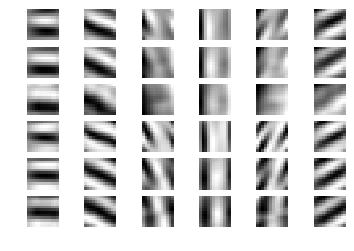

In [43]:
feature_map = conv_forward(train_set_x[52000],filters,1,0)
plotFilters(feature_map.shape[2],feature_map)

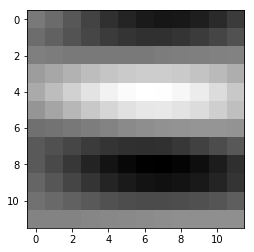

In [44]:
#checking 0th index alone
plt.imshow(feature_map[:,:,0], cmap = 'gray')

after pooling


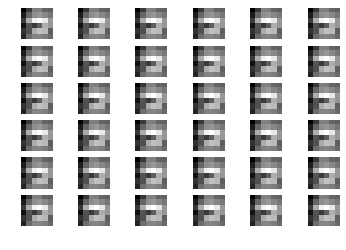

In [45]:
print("after pooling")
pooled_feature_map = pool_forward(feature_map,"max",2, 2)
plotFilters(pooled_feature_map.shape[2],pooled_feature_map)

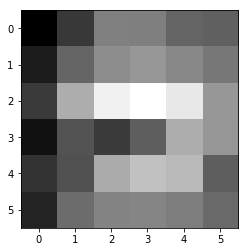

In [46]:
#checking 0th index alone
plt.imshow(pooled_feature_map[:,:,0], cmap = 'gray')

In [15]:
def flatten(input):
    return input.flatten()

In [26]:
def prepareX(data):
    preparedData =[]
    for i in data:
#         print(i)
        preparedData.append(flatten(pool_forward(conv_forward(i,filters,1,0),"max",2, 2)))
    return preparedData

In [27]:
Xtrain = prepareX(train_set_x)
Xtest = prepareX(test_set_x)

In [39]:

#saving processed data for later use
with open('xtrain.txt', 'w') as filehandle:
    json.dump(Xtrain, filehandle)
with open('xtest.txt', 'w') as filehandle:
    json.dump(Xtest, filehandle) 

In [6]:
#retreiving processed data
import json
with open('xtrain.txt', 'r') as filehandle:
    Xtrain = json.load(filehandle)
with open('xtest.txt', 'r') as filehandle:
    Xtest = json.load(filehandle)

In [7]:
Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
train_set_y=Encode(train_set_y)
test_set_y = Encode(test_set_y)
print(type(Xtrain),type(Xtest),type(train_set_y),type(test_set_y))
print(Xtrain.shape)
print(Xtest.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 1296)
(10000, 1296)


In [8]:
X, y = shuffle(Xtrain, train_set_y)

In [9]:
trainPercentage = 0.80
testPercantage= 0.20

trainX = X[:int(trainPercentage * len(X))] # training data point
trainY = y[:int(trainPercentage * len(y))] # training lables

validX = X[int(trainPercentage * len(X)) :  ] # validation data point
validY = y[int(trainPercentage * len(y))  :   ]# validation lables

### Neural Network

In [10]:
# Create a Neural_Network class
class Neural_Network(object):    
    def __init__(self,no_of_layers = 2, input_dim = 1296, neurons_per_layer =[784,128,64,10]):        
        # size of layers
        self.inputSize = input_dim
        #weights
        self.W1 = np.random.randn(self.inputSize,neurons_per_layer[0] )
        self.b1 = np.ones((1,neurons_per_layer[0]))
        self.W2 = np.random.randn(neurons_per_layer[0],neurons_per_layer[1] )
        self.b2 = np.ones((1,neurons_per_layer[1]))
        self.W3 = np.random.randn(neurons_per_layer[1], neurons_per_layer[2] )
        self.b3 = np.ones((1,neurons_per_layer[2]))
        self.W4 = np.random.randn(neurons_per_layer[2], neurons_per_layer[3])
        self.b4 = np.ones((1,neurons_per_layer[3]))
        
    def Encode(self,l):
        c = np.arange(10)
        one_hot = (c == l).astype(np.int)
        return one_hot    
    
    def feedforward(self, X):
        
        self.l1 = np.dot(X, self.W1) + self.b1 
        self.a1 = self.sigmoid(self.l1)
        self.l2 = np.dot(self.a1, self.W2) + self.b2  
        self.a2 = self.sigmoid(self.l2)
        self.l3 = np.dot(self.a2, self.W3) + self.b3 
        self.a3 = self.sigmoid(self.l3)
        self.l4 = np.dot(self.a3, self.W4) + self.b4
        self.a4 = self.softmax(self.l4)
#         print( "y_pred shape",self.a3.shape)
        return self.a4
        
    def softmax(self, X):
        
        exps = np.exp(X - np.max(X))
        return exps / np.sum(exps, axis=1, keepdims= True)
    

    def softmax_derivative(softmax):
        s = softmax.reshape(-1,1)
        return np.diagflat(s) - np.dot(s, s.T)


    def sigmoid(self, s):
        # activation function
        return (1/ (1 + np.exp(-s))) # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
#         s = self.sigmoid(s)
        sigmoidDerivative = s * (1 - s)
        return sigmoidDerivative # apply derivative of sigmoid on s and return it's value 

    def tanh(self, s):
        # activation function
        
        return (np.exp(s) - np.exp(-s)) / (np.exp(s) + np.exp(-s)) # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        
        return 1 - (s)**2
    def backwardpropagate(self,X, Y, y_pred, lr):
        
        L4 = (y_pred- Y)
        norm = 1/X.shape[0]
        dw4 = np.dot(self.a3.T, L4) * norm
        db4 = np.sum(L4, axis=0, keepdims = True) * norm
        da3=self.sigmoid_derivative(self.a3)
        L3 = np.multiply(np.dot(L4,self.W4.T), da3)
        dw3 = np.dot(self.a2.T, L3) * norm
        db3 = np.sum(L3, axis=0, keepdims = True)* norm
        da2 =self.sigmoid_derivative(self.a2)
        L2 = np.multiply(np.dot(L3,self.W3.T),da2 )
        dw2 = np.dot(self.a1.T, L2)* norm
        db2 = np.sum(L2, axis=0, keepdims = True)* norm
        da1 = self.sigmoid_derivative(self.a1)
        L1 = np.multiply(np.dot(L2,self.W2.T),da1 )
        dw1 = np.dot(X.T, L1)* norm
        db1 = np.sum(L1, axis=0, keepdims = True)* norm
        
        self.W1 -= lr * dw1
        self.b1 -= lr * db1
        self.W2 -= lr * dw2
        self.b2 -= lr * db2
        self.W3 -= lr * dw3
        self.b3 -= lr * db3
        self.W4 -= lr * dw4
        self.b4 -= lr * db4
        
   
    def crossentropy(self, Y, Y_pred):
        cerror = - np.sum(Y * np.log2 (Y_pred + 1e-8)) /len(Y)
        return cerror #error

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001,gr_size = 1, plot_err = True ,validationX = 'Null', validationY = 'Null'):

        errorTrain =[]
        errorValid =[]
        ValidationAccuracy =[]
        TraingingAccuracy = []
        for i in range(epochs):
            for j in range(0, trainX.shape[0], gr_size):
                data = trainX[j:j+gr_size]
                label = trainY[j:j+gr_size]
                prediction = self.feedforward(data)
                self.backwardpropagate(X=data, Y=label, y_pred= prediction,lr= learningRate )

 
            errorTrain.append(self.crossentropy(Y=trainY,Y_pred =self.feedforward(trainX)))
            errorValid.append(self.crossentropy(Y=validationY,Y_pred = self.feedforward(validationX)))
            
            TraingingAccuracy.append(self.accuracy(trainX,trainY))
            ValidationAccuracy.append(self.accuracy(validationX,validationY))
            print("...............................................")
            print("epoch: ", i, "T error: ",errorTrain[-1],"V error: ",errorValid[-1], "T acc: ", TraingingAccuracy[-1], "V acc :",ValidationAccuracy[-1])
            
        
        if(plot_err): #Training Loss
            plt.plot(range(epochs), errorTrain, label = 'Training loss curve')
            plt.legend()
            plt.title('loss curves using activation function ')
        if(validationX != 'Null' and validationY != 'Null'):
            plt.plot(range(epochs), errorValid, label = 'Validation loss curve')
            plt.legend()
            plt.xlabel('Epochs') 
            plt.ylabel('Entropy Loss') 
            plt.show()
            
            plt.plot(range(epochs), TraingingAccuracy, label = 'Trainging accuracy')
            plt.plot(range(epochs), ValidationAccuracy, label = 'Validation accuracy')
            plt.legend()
            plt.title('Accuracy curves using activation function ' )
            plt.xlabel('Epochs') 
            plt.ylabel('Accuracy') 
            plt.show()
        
    def predict(self, testX):
        # predict the value of testX
        return self.feedforward(testX)
    
    def accuracy(self, X, Y):
    
        test_pred = self.predict(X)
        pred = np.argmax(test_pred, axis=1)
        y = np.argmax(Y, axis=1)        
        accuracy = (pred == y)
        accuracy = np.mean(accuracy)
        accuracy =accuracy * 100
#         print(accuracy)
        return accuracy
          
        
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        print('saving model')
        saved_model = np.save('msds19027_task3_01.npy', self.W1)
        saved_model1 = np.save("msds19027_task3_02.npy", self.W2)
        saved_model2 = np.save("msds19027_task3_03.npy", self.W3)
        print('model saved..')
        
    def loadModel(self,name):
        # load your trained model, load exactly how you stored it.
        self.W1= np.load("msds19027_task3_01.npy" )
        self.W2= np.load("msds19027_task3_02.npy")
        self.W3= np.load("msds19027_task3_03.npy")
        print(self.W1)
        print(self.W2)
        print(self.W3)


...............................................
epoch:  0 T error:  2.4004314576433137 V error:  2.3994695846691343 T acc:  42.625 V acc : 42.36666666666667
...............................................
epoch:  1 T error:  2.120124373500022 V error:  2.140795525967432 T acc:  50.35625 V acc : 49.9
...............................................
epoch:  2 T error:  2.1518178236527246 V error:  2.160596072698197 T acc:  49.50833333333333 V acc : 48.791666666666664
...............................................
epoch:  3 T error:  2.0886341537023276 V error:  2.094381650995063 T acc:  51.15 V acc : 50.85833333333334
...............................................
epoch:  4 T error:  1.9831737202575532 V error:  1.993003323674396 T acc:  53.014583333333334 V acc : 53.18333333333334
...............................................
epoch:  5 T error:  1.9496612457968012 V error:  1.9669423601863176 T acc:  55.125 V acc : 55.08333333333333
...............................................
epo

D:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


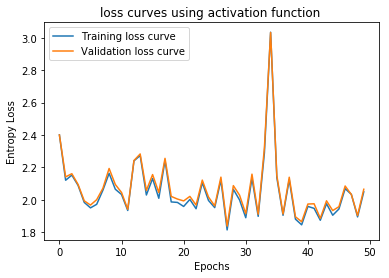

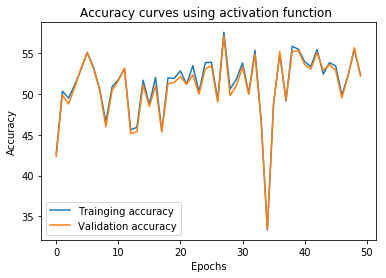

In [60]:
model = Neural_Network(2,1296, [784,128,64,10])
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 50, learningRate = .1,gr_size = 170, validationX = validX, validationY = validY)

In [61]:
model.accuracy(Xtest,test_set_y)

53.09

...............................................
epoch:  0 T error:  3.031280829134982 V error:  3.040074691487319 T acc:  28.870833333333334 V acc : 28.433333333333334
...............................................
epoch:  1 T error:  2.6844846295064757 V error:  2.693438488019165 T acc:  37.33958333333333 V acc : 36.975
...............................................
epoch:  2 T error:  2.4504819298688227 V error:  2.4691522531301007 T acc:  42.28541666666666 V acc : 42.358333333333334
...............................................
epoch:  3 T error:  2.3223373250794905 V error:  2.3490998021349707 T acc:  45.608333333333334 V acc : 44.99166666666667
...............................................
epoch:  4 T error:  2.223372358663999 V error:  2.243277784512121 T acc:  48.364583333333336 V acc : 47.775
...............................................
epoch:  5 T error:  2.1564623830858283 V error:  2.1897267899666524 T acc:  49.84583333333333 V acc : 48.66666666666667
..............

D:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


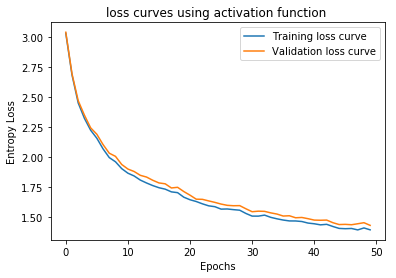

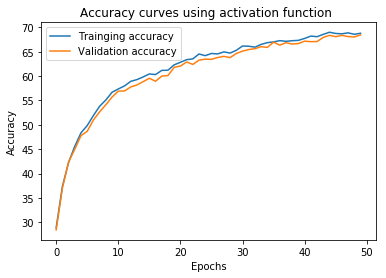

In [58]:
model = Neural_Network(2,1296, [784,128,64,10])
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 50, learningRate = .01,gr_size = 128, validationX = validX, validationY = validY)

In [59]:
model.accuracy(Xtest,test_set_y)

69.14

...............................................
epoch:  0 T error:  3.128204280554417 V error:  3.1345879977585107 T acc:  30.26875 V acc : 30.391666666666666
...............................................
epoch:  1 T error:  2.577570296598474 V error:  2.6004335238300818 T acc:  40.37291666666666 V acc : 40.483333333333334
...............................................
epoch:  2 T error:  2.378780600297699 V error:  2.3889588150984205 T acc:  45.40625 V acc : 45.09166666666667
...............................................
epoch:  3 T error:  2.2402765209046236 V error:  2.257935222592723 T acc:  48.36666666666667 V acc : 47.983333333333334
...............................................
epoch:  4 T error:  2.1491735310369537 V error:  2.17277337296396 T acc:  50.927083333333336 V acc : 50.19166666666667
...............................................
epoch:  5 T error:  2.0602070164065913 V error:  2.083201499828033 T acc:  52.922916666666666 V acc : 52.108333333333334
...........

...............................................
epoch:  51 T error:  1.403523332775361 V error:  1.436501129697548 T acc:  68.79791666666667 V acc : 68.025
...............................................
epoch:  52 T error:  1.4124017237849842 V error:  1.4454969551067864 T acc:  68.525 V acc : 68.16666666666666
...............................................
epoch:  53 T error:  1.3913361482280906 V error:  1.4358087689360315 T acc:  69.16041666666666 V acc : 68.425
...............................................
epoch:  54 T error:  1.3874354482507931 V error:  1.4323170083958194 T acc:  68.94583333333333 V acc : 68.25
...............................................
epoch:  55 T error:  1.3827026034024086 V error:  1.4100377144852343 T acc:  69.49375 V acc : 69.28333333333333
...............................................
epoch:  56 T error:  1.3806004569630956 V error:  1.4147945135651625 T acc:  69.22083333333333 V acc : 68.72500000000001
..........................................

...............................................
epoch:  102 T error:  1.209802815073997 V error:  1.2460150670541779 T acc:  73.21666666666667 V acc : 72.70833333333333
...............................................
epoch:  103 T error:  1.2106749219582278 V error:  1.2474291249044707 T acc:  73.42291666666667 V acc : 72.46666666666667
...............................................
epoch:  104 T error:  1.2140009434914079 V error:  1.2522965180505752 T acc:  73.06458333333333 V acc : 72.46666666666667
...............................................
epoch:  105 T error:  1.2075850903722176 V error:  1.26251829576194 T acc:  73.18541666666667 V acc : 72.2
...............................................
epoch:  106 T error:  1.221733706142088 V error:  1.2586302792842963 T acc:  72.8375 V acc : 71.86666666666667
...............................................
epoch:  107 T error:  1.2169013883774162 V error:  1.2514831268256512 T acc:  72.96666666666667 V acc : 72.32499999999999
.......

...............................................
epoch:  153 T error:  1.1221411536312862 V error:  1.1899477608950577 T acc:  75.175 V acc : 74.125
...............................................
epoch:  154 T error:  1.1267860565926175 V error:  1.1812543551753154 T acc:  75.02499999999999 V acc : 73.825
...............................................
epoch:  155 T error:  1.1288668938812436 V error:  1.178135414803796 T acc:  75.16458333333334 V acc : 74.53333333333333
...............................................
epoch:  156 T error:  1.1170723292464433 V error:  1.1657331805067386 T acc:  75.48333333333333 V acc : 74.71666666666667
...............................................
epoch:  157 T error:  1.1325438733736906 V error:  1.1734979489380948 T acc:  75.22291666666666 V acc : 74.46666666666667
...............................................
epoch:  158 T error:  1.1109911478660142 V error:  1.165682281321271 T acc:  75.47500000000001 V acc : 74.51666666666667
...............

...............................................
epoch:  203 T error:  1.041774240791353 V error:  1.0925328619309895 T acc:  76.95416666666667 V acc : 76.21666666666667
...............................................
epoch:  204 T error:  1.0417656075409625 V error:  1.0947350717417 T acc:  76.57291666666667 V acc : 75.84166666666667
...............................................
epoch:  205 T error:  1.0486779861768556 V error:  1.089618522986624 T acc:  76.73333333333333 V acc : 75.925
...............................................
epoch:  206 T error:  1.0557269448426085 V error:  1.0983353310189363 T acc:  76.775 V acc : 76.175
...............................................
epoch:  207 T error:  1.0539335550461364 V error:  1.1045798878593052 T acc:  76.67083333333333 V acc : 75.93333333333334
...............................................
epoch:  208 T error:  1.0456621945433782 V error:  1.0929609062511862 T acc:  76.8625 V acc : 76.04166666666666
............................

...............................................
epoch:  254 T error:  1.0008474143361905 V error:  1.0551341716017926 T acc:  77.95208333333333 V acc : 76.85
...............................................
epoch:  255 T error:  1.0094255836523258 V error:  1.0648202032517928 T acc:  77.83541666666667 V acc : 76.8
...............................................
epoch:  256 T error:  1.0030689480399422 V error:  1.0504883076229565 T acc:  77.79791666666667 V acc : 77.3
...............................................
epoch:  257 T error:  1.0029639933063852 V error:  1.051831317841009 T acc:  78.07916666666667 V acc : 77.09166666666667
...............................................
epoch:  258 T error:  0.9959630769800121 V error:  1.0435538690831065 T acc:  77.94791666666666 V acc : 76.95
...............................................
epoch:  259 T error:  0.994803346142389 V error:  1.0447887559600577 T acc:  77.99374999999999 V acc : 77.44166666666666
................................

...............................................
epoch:  305 T error:  0.9605131130348524 V error:  1.0149721670403513 T acc:  78.80416666666666 V acc : 78.10000000000001
...............................................
epoch:  306 T error:  0.9749001830307302 V error:  1.0295467906156681 T acc:  78.60208333333333 V acc : 77.725
...............................................
epoch:  307 T error:  0.9628372872226296 V error:  1.0249205129186887 T acc:  78.79791666666667 V acc : 77.89166666666667
...............................................
epoch:  308 T error:  0.962146809730885 V error:  1.0202364300583702 T acc:  79.01666666666667 V acc : 78.3
...............................................
epoch:  309 T error:  0.9531363529581469 V error:  1.018282323658048 T acc:  79.1125 V acc : 77.97500000000001
...............................................
epoch:  310 T error:  0.9574833055258927 V error:  1.0242958998844607 T acc:  78.92916666666666 V acc : 77.66666666666666
................

...............................................
epoch:  355 T error:  0.9346582860555818 V error:  0.9872955137433773 T acc:  79.48958333333334 V acc : 78.49166666666667
...............................................
epoch:  356 T error:  0.9232553961274628 V error:  0.9859532167230868 T acc:  79.79583333333333 V acc : 78.44166666666666
...............................................
epoch:  357 T error:  0.9238789192784378 V error:  0.9795350550733408 T acc:  79.6875 V acc : 78.44166666666666
...............................................
epoch:  358 T error:  0.9358946110353272 V error:  1.004191687432088 T acc:  79.26875 V acc : 77.98333333333333
...............................................
epoch:  359 T error:  0.9273349566722608 V error:  0.9896407026030961 T acc:  79.35416666666667 V acc : 78.06666666666666
...............................................
epoch:  360 T error:  0.9265349932880244 V error:  0.9923098009766556 T acc:  79.38541666666666 V acc : 77.71666666666667


...............................................
epoch:  405 T error:  0.8852377354390804 V error:  0.9701607261578035 T acc:  80.51666666666667 V acc : 79.0
...............................................
epoch:  406 T error:  0.8828620654184431 V error:  0.963424176765629 T acc:  80.5125 V acc : 78.98333333333333
...............................................
epoch:  407 T error:  0.8913770244541362 V error:  0.9520271018134782 T acc:  80.42291666666667 V acc : 79.00833333333334
...............................................
epoch:  408 T error:  0.8906473044108802 V error:  0.9692858110710015 T acc:  80.52083333333333 V acc : 78.93333333333334
...............................................
epoch:  409 T error:  0.8855148202342643 V error:  0.9580750162391621 T acc:  80.50833333333334 V acc : 79.325
...............................................
epoch:  410 T error:  0.8851399092683522 V error:  0.9610075201263178 T acc:  80.49583333333334 V acc : 79.4
............................

...............................................
epoch:  455 T error:  0.8722749320353865 V error:  0.9363954781952231 T acc:  80.75833333333333 V acc : 79.55
...............................................
epoch:  456 T error:  0.8707583476381097 V error:  0.927933176209393 T acc:  80.89583333333333 V acc : 79.95
...............................................
epoch:  457 T error:  0.8718923712225799 V error:  0.9269381851024315 T acc:  80.81875 V acc : 79.80000000000001
...............................................
epoch:  458 T error:  0.8692484830928104 V error:  0.9486882072391739 T acc:  80.84791666666666 V acc : 79.66666666666666
...............................................
epoch:  459 T error:  0.855233614578014 V error:  0.9280227060510196 T acc:  81.36666666666666 V acc : 79.9


D:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


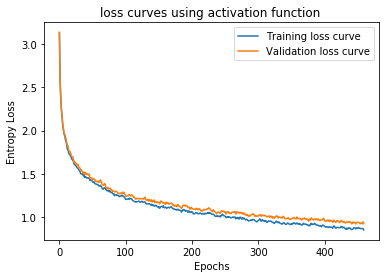

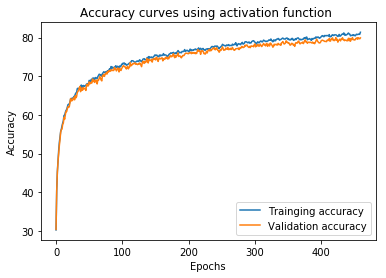

test accuracy 81.14


In [71]:
model = Neural_Network(3,1296, [800,300,90,10])
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 460, learningRate = .01,gr_size = 150, validationX = validX, validationY = validY)
acc = model.accuracy(Xtest,test_set_y)
print("test accuracy", acc)

In [12]:
# Create a Neural_Network class
class Neural_Network3(object):    
    def __init__(self,no_of_layers = 2, input_dim = 1296, neurons_per_layer =[600,160,10]):        
        # size of layers
        self.inputSize = input_dim

        #weights
        self.W1 = np.random.randn(self.inputSize,neurons_per_layer[0] )
        self.b1 = np.ones((1,neurons_per_layer[0]))
        self.W2 = np.random.randn(neurons_per_layer[0],neurons_per_layer[1] )
        self.b2 = np.ones((1,neurons_per_layer[1]))
        self.W3 = np.random.randn(neurons_per_layer[1], neurons_per_layer[2] )
        self.b3 = np.ones((1,neurons_per_layer[2]))

        
    def Encode(self,l):
        c = np.arange(10)
        one_hot = (c == l).astype(np.int)
        return one_hot    
    
    def feedforward(self, X):
        
        self.l1 = np.dot(X, self.W1) + self.b1 
        self.a1 = self.sigmoid(self.l1)
        self.l2 = np.dot(self.a1, self.W2) + self.b2  
        self.a2 = self.sigmoid(self.l2)
        self.l3 = np.dot(self.a2, self.W3) + self.b3 
        self.a3 = self.softmax(self.l3)

        return self.a3
        
    def softmax(self, X):
        
        exps = np.exp(X - np.max(X))
        return exps / np.sum(exps, axis=1, keepdims= True)
    

    def softmax_derivative(softmax):
        s = softmax.reshape(-1,1)
        return np.diagflat(s) - np.dot(s, s.T)


    def sigmoid(self, s):
        # activation function
        return (1/ (1 + np.exp(-s))) # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
#         s = self.sigmoid(s)
        sigmoidDerivative = s * (1 - s)
        return sigmoidDerivative # apply derivative of sigmoid on s and return it's value 

    def tanh(self, s):
        # activation function
        
        return (np.exp(s) - np.exp(-s)) / (np.exp(s) + np.exp(-s)) # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        
        return 1 - (s)**2
    def backwardpropagate(self,X, Y, y_pred, lr):
        
        
        L3 = (y_pred- Y)
        norm = 1/X.shape[0]
        dw3 = np.dot(self.a2.T, L3) * norm
        db3 = np.sum(L3, axis=0, keepdims = True) * norm
        da2 = self.sigmoid_derivative(self.a2)
        L2 = np.multiply(np.dot(L3,self.W3.T),da2 )
        dw2 = np.dot(self.a1.T, L2)* norm
        db2 = np.sum(L2, axis=0, keepdims = True)* norm
        da1 = self.sigmoid_derivative(self.a1)
        L1 = np.multiply(np.dot(L2,self.W2.T), da1)
        dw1 = np.dot(X.T, L1)* norm
        db1 = np.sum(L1, axis=0, keepdims = True)* norm
        
        self.W1 -= lr * dw1
        self.b1 -= lr * db1
        self.W2 -= lr * dw2
        self.b2 -= lr * db2
        self.W3 -= lr * dw3
        self.b3 -= lr * db3
        
   
    def crossentropy(self, Y, Y_pred):
        cerror = - np.sum(Y * np.log2 (Y_pred + 1e-8)) /len(Y)
        return cerror #error

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001,gr_size = 1, plot_err = True ,validationX = 'Null', validationY = 'Null'):

        errorTrain =[]
        errorValid =[]
        ValidationAccuracy =[]
        TraingingAccuracy = []
        for i in range(epochs):
            for j in range(0, trainX.shape[0], gr_size):
                data = trainX[j:j+gr_size]
                label = trainY[j:j+gr_size]
                prediction = self.feedforward(data)
                self.backwardpropagate(X=data, Y=label, y_pred= prediction,lr= learningRate )

 
            errorTrain.append(self.crossentropy(Y=trainY,Y_pred =self.feedforward(trainX)))
            errorValid.append(self.crossentropy(Y=validationY,Y_pred = self.feedforward(validationX)))
            
            TraingingAccuracy.append(self.accuracy(trainX,trainY))
            ValidationAccuracy.append(self.accuracy(validationX,validationY))
            print("...............................................")
            print("epoch: ", i, "T error: ",errorTrain[-1],"V error: ",errorValid[-1], "T acc: ", TraingingAccuracy[-1], "V acc :",ValidationAccuracy[-1])
            
        
        if(plot_err): #Training Loss
            plt.plot(range(epochs), errorTrain, label = 'Training loss curve')
            plt.legend()
            plt.title('loss curves using activation function ')
        if(validationX != 'Null' and validationY != 'Null'):
            plt.plot(range(epochs), errorValid, label = 'Validation loss curve')
            plt.legend()
            plt.xlabel('Epochs') 
            plt.ylabel('Entropy Loss') 
            plt.show()
            
            plt.plot(range(epochs), TraingingAccuracy, label = 'Trainging accuracy')
            plt.plot(range(epochs), ValidationAccuracy, label = 'Validation accuracy')
            plt.legend()
            plt.title('Accuracy curves using activation function ' )
            plt.xlabel('Epochs') 
            plt.ylabel('Accuracy') 
            plt.show()
        
    def predict(self, testX):
        # predict the value of testX
        return self.feedforward(testX)
    
    def accuracy(self, X, Y):
    
        test_pred = self.predict(X)
        pred = np.argmax(test_pred, axis=1)
        y = np.argmax(Y, axis=1)        
        accuracy = (pred == y)
        accuracy = np.mean(accuracy)
        accuracy =accuracy * 100
#         print(accuracy)
        return accuracy
          
        
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        print('saving model')
        saved_model = np.save('msds19027_ass3_01.npy', self.W1)
        saved_model1 = np.save("msds19027_ass3_02.npy", self.W2)
        saved_model2 = np.save("msds19027_ass3_03.npy", self.W3)
        print('model saved..')
        
    def loadModel(self,name):
        # load your trained model, load exactly how you stored it.
        self.W1= np.load('msds19027_ass3_01.npy')
        self.W2= np.load('msds19027_ass3_02.npy')
        self.W3= np.load('msds19027_ass3_03.npy')
#         print(self.W1)
#         print(self.W2)
#         print(self.W3)

    

...............................................
epoch:  0 T error:  3.518689160631721 V error:  3.547660718989279 T acc:  26.5375 V acc : 25.90833333333333
...............................................
epoch:  1 T error:  2.808442370635772 V error:  2.8132193823612646 T acc:  35.5625 V acc : 35.56666666666667
...............................................
epoch:  2 T error:  2.5292218672880122 V error:  2.5330812496613517 T acc:  40.949999999999996 V acc : 40.94166666666666
...............................................
epoch:  3 T error:  2.3651729166261606 V error:  2.3779073633629078 T acc:  44.59583333333333 V acc : 44.40833333333333
...............................................
epoch:  4 T error:  2.2401891566154952 V error:  2.2494135196274145 T acc:  47.74791666666667 V acc : 47.608333333333334
...............................................
epoch:  5 T error:  2.1447949416438044 V error:  2.165002715364004 T acc:  50.0625 V acc : 49.75833333333333
........................

D:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


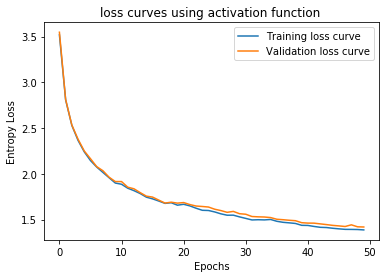

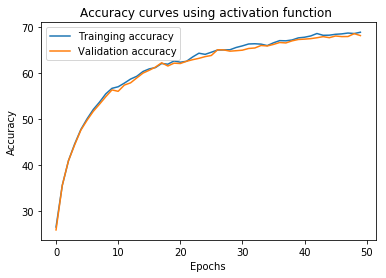

In [65]:
model = Neural_Network3(2,1296, [600,160,10])
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 50, learningRate = .01,gr_size = 150, validationX = validX, validationY = validY)

In [66]:
model.accuracy(Xtest,test_set_y)

68.74

...............................................
epoch:  0 T error:  3.6019461001208994 V error:  3.589957081249181 T acc:  32.087500000000006 V acc : 32.46666666666667
...............................................
epoch:  1 T error:  2.7502909244738154 V error:  2.763374645468043 T acc:  42.325 V acc : 42.175000000000004
...............................................
epoch:  2 T error:  2.494122258818692 V error:  2.5298744867108427 T acc:  46.25208333333333 V acc : 45.916666666666664
...............................................
epoch:  3 T error:  2.275284983646539 V error:  2.2969397912576826 T acc:  48.83125 V acc : 48.80833333333333
...............................................
epoch:  4 T error:  2.13627097387321 V error:  2.1687318146893655 T acc:  51.44583333333333 V acc : 51.725
...............................................
epoch:  5 T error:  2.050278454510112 V error:  2.0925363230567147 T acc:  53.65416666666667 V acc : 53.349999999999994
..........................

...............................................
epoch:  51 T error:  1.3740789759845347 V error:  1.4108782280638201 T acc:  69.28541666666666 V acc : 68.93333333333334
...............................................
epoch:  52 T error:  1.3779818563342576 V error:  1.416876182919849 T acc:  69.17291666666667 V acc : 68.91666666666667
...............................................
epoch:  53 T error:  1.3611100576994306 V error:  1.4026406398624207 T acc:  69.79583333333333 V acc : 68.95833333333333
...............................................
epoch:  54 T error:  1.3481645348383289 V error:  1.3907230080158142 T acc:  69.99166666666666 V acc : 69.55833333333334
...............................................
epoch:  55 T error:  1.3625726324637408 V error:  1.4158232871363101 T acc:  69.64375000000001 V acc : 69.04166666666667
...............................................
epoch:  56 T error:  1.3595592634282514 V error:  1.3991438265945648 T acc:  69.49583333333334 V acc : 69.10

...............................................
epoch:  101 T error:  1.1981473794778255 V error:  1.2552542917151255 T acc:  73.40416666666667 V acc : 72.66666666666667
...............................................
epoch:  102 T error:  1.198121159928651 V error:  1.2622443918184747 T acc:  73.12708333333333 V acc : 72.775
...............................................
epoch:  103 T error:  1.1933889517502363 V error:  1.2563300867141385 T acc:  73.47916666666666 V acc : 72.54166666666667
...............................................
epoch:  104 T error:  1.195049991532674 V error:  1.252193204627719 T acc:  73.68958333333333 V acc : 73.18333333333334
...............................................
epoch:  105 T error:  1.1823822271552205 V error:  1.243033984965265 T acc:  73.92916666666667 V acc : 72.85833333333333
...............................................
epoch:  106 T error:  1.1812710301399236 V error:  1.2368565372109652 T acc:  73.80416666666667 V acc : 72.7083333333

...............................................
epoch:  152 T error:  1.090682043658213 V error:  1.13276409522734 T acc:  75.87083333333334 V acc : 75.14166666666667
...............................................
epoch:  153 T error:  1.0863925067308524 V error:  1.1502138697311148 T acc:  75.86666666666667 V acc : 75.09166666666667
...............................................
epoch:  154 T error:  1.0883642912020246 V error:  1.1358216434256754 T acc:  75.9875 V acc : 75.18333333333334
...............................................
epoch:  155 T error:  1.0745342539325757 V error:  1.123323806965402 T acc:  76.50833333333334 V acc : 75.98333333333333
...............................................
epoch:  156 T error:  1.0943681574919517 V error:  1.1500020515213192 T acc:  75.67083333333333 V acc : 74.84166666666667
...............................................
epoch:  157 T error:  1.0912964435333712 V error:  1.1425554157561257 T acc:  75.78333333333333 V acc : 75.1
.......

...............................................
epoch:  203 T error:  1.0126689922286245 V error:  1.0643845111039443 T acc:  77.60000000000001 V acc : 76.93333333333334
...............................................
epoch:  204 T error:  1.0102701052070495 V error:  1.0718697559017776 T acc:  77.7375 V acc : 76.89166666666667
...............................................
epoch:  205 T error:  1.0055335583139577 V error:  1.0684139878070953 T acc:  77.76041666666667 V acc : 77.075
...............................................
epoch:  206 T error:  1.0129480025800233 V error:  1.0575766406106881 T acc:  77.67500000000001 V acc : 77.025
...............................................
epoch:  207 T error:  1.0108472832013762 V error:  1.057889912905949 T acc:  77.49166666666667 V acc : 76.84166666666667
...............................................
epoch:  208 T error:  1.014453783128587 V error:  1.068720552810118 T acc:  77.62708333333333 V acc : 76.63333333333333
...............

...............................................
epoch:  253 T error:  0.9621785049094966 V error:  1.0258776265080451 T acc:  78.70208333333333 V acc : 77.70833333333333
...............................................
epoch:  254 T error:  0.9445351946316005 V error:  1.01847982750027 T acc:  79.26458333333333 V acc : 77.84166666666667
...............................................
epoch:  255 T error:  0.9527169540683009 V error:  1.023793139816529 T acc:  79.05 V acc : 77.79166666666667
...............................................
epoch:  256 T error:  0.9604555090568245 V error:  1.030109951268727 T acc:  79.06458333333333 V acc : 78.14999999999999
...............................................
epoch:  257 T error:  0.9503853425844874 V error:  1.0235484058544053 T acc:  79.18333333333332 V acc : 78.03333333333333
...............................................
epoch:  258 T error:  0.955788752927239 V error:  1.0244134877592774 T acc:  78.58958333333334 V acc : 77.8
..........

D:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


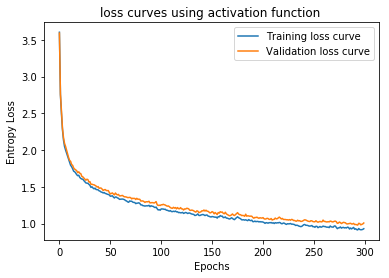

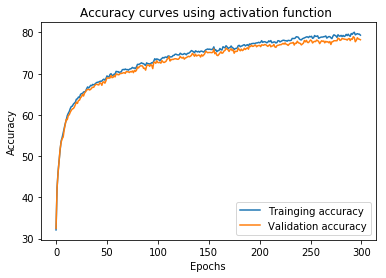

In [67]:
model = Neural_Network3(2,1296, [600,160,10])
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 300, learningRate = .01,gr_size = 150, validationX = validX, validationY = validY)

In [68]:
model.accuracy(Xtest,test_set_y)

79.11

...............................................
epoch:  0 T error:  2.60517950062687 V error:  2.6089016616931917 T acc:  38.49583333333334 V acc : 38.56666666666666
...............................................
epoch:  1 T error:  2.462136937644885 V error:  2.482068060906356 T acc:  41.572916666666664 V acc : 40.99166666666667
...............................................
epoch:  2 T error:  2.4250519029183004 V error:  2.4308492178393704 T acc:  40.23125 V acc : 39.08333333333333
...............................................
epoch:  3 T error:  2.2706695064675513 V error:  2.286397993855535 T acc:  44.94375 V acc : 45.108333333333334
...............................................
epoch:  4 T error:  2.299919434009144 V error:  2.319106810709898 T acc:  42.41666666666667 V acc : 41.391666666666666
...............................................
epoch:  5 T error:  2.2216344185778407 V error:  2.2399692821934294 T acc:  45.89375 V acc : 45.59166666666667
.......................

...............................................
epoch:  51 T error:  1.948504119913127 V error:  1.9786124519999413 T acc:  52.56041666666667 V acc : 52.09166666666667
...............................................
epoch:  52 T error:  1.968192090607422 V error:  1.9857006158276709 T acc:  51.50833333333333 V acc : 51.15
...............................................
epoch:  53 T error:  1.9333410823307107 V error:  1.966276747112576 T acc:  53.5875 V acc : 53.125
...............................................
epoch:  54 T error:  1.8379369970907538 V error:  1.8478817797106706 T acc:  57.32708333333333 V acc : 56.95
...............................................
epoch:  55 T error:  1.8662299741886361 V error:  1.903478325013348 T acc:  55.137499999999996 V acc : 54.55
...............................................
epoch:  56 T error:  1.8747447466411047 V error:  1.888990529682775 T acc:  55.10625 V acc : 55.13333333333333
...............................................
epoch:  

...............................................
epoch:  102 T error:  1.785499144146479 V error:  1.8053112915984002 T acc:  58.97708333333333 V acc : 58.266666666666666
...............................................
epoch:  103 T error:  1.6989861386103966 V error:  1.7347954542942203 T acc:  60.40208333333334 V acc : 59.25
...............................................
epoch:  104 T error:  1.8335315235347531 V error:  1.8604531574327154 T acc:  55.693749999999994 V acc : 54.883333333333326
...............................................
epoch:  105 T error:  1.8278125867253772 V error:  1.8430767257823908 T acc:  57.46458333333333 V acc : 57.55833333333334
...............................................
epoch:  106 T error:  1.6543738966646955 V error:  1.6656131123455906 T acc:  61.8625 V acc : 62.20833333333333
...............................................
epoch:  107 T error:  1.7684196260478666 V error:  1.7781881783136648 T acc:  60.24791666666667 V acc : 59.983333333333334

...............................................
epoch:  152 T error:  1.7739006308954297 V error:  1.7885294431555567 T acc:  58.020833333333336 V acc : 57.508333333333326
...............................................
epoch:  153 T error:  1.6693813118562302 V error:  1.671786679317308 T acc:  61.84583333333333 V acc : 61.575
...............................................
epoch:  154 T error:  1.6318086407672754 V error:  1.639281973948882 T acc:  63.15208333333333 V acc : 63.5
...............................................
epoch:  155 T error:  1.896284414774364 V error:  1.919625793666269 T acc:  53.40208333333333 V acc : 52.400000000000006
...............................................
epoch:  156 T error:  1.7634216026150085 V error:  1.7850932094538545 T acc:  59.2375 V acc : 58.94166666666667
...............................................
epoch:  157 T error:  1.8209879593520906 V error:  1.8363886353055123 T acc:  58.69583333333333 V acc : 58.425000000000004
..............

...............................................
epoch:  202 T error:  1.7658790918795384 V error:  1.7981097858157076 T acc:  59.199999999999996 V acc : 58.62500000000001
...............................................
epoch:  203 T error:  1.6913653455910156 V error:  1.7110993386377407 T acc:  61.522916666666674 V acc : 61.20833333333333
...............................................
epoch:  204 T error:  1.8107071935882186 V error:  1.8258408429859085 T acc:  57.70833333333333 V acc : 57.983333333333334
...............................................
epoch:  205 T error:  1.7861587396759968 V error:  1.8155194492800837 T acc:  56.61875 V acc : 56.13333333333333
...............................................
epoch:  206 T error:  1.7174024465611277 V error:  1.739263858736177 T acc:  59.36458333333333 V acc : 59.375
...............................................
epoch:  207 T error:  1.661226063676055 V error:  1.6908045929758007 T acc:  61.45 V acc : 60.99166666666667
...........

...............................................
epoch:  252 T error:  1.6518524002740853 V error:  1.6908756625588863 T acc:  62.0375 V acc : 61.275
...............................................
epoch:  253 T error:  1.6017628710620877 V error:  1.6305096150513627 T acc:  63.739583333333336 V acc : 62.675000000000004
...............................................
epoch:  254 T error:  1.655630663949921 V error:  1.6695046556759199 T acc:  61.57083333333333 V acc : 61.49166666666667
...............................................
epoch:  255 T error:  1.7823952290574556 V error:  1.8088644173729116 T acc:  59.72291666666667 V acc : 58.85
...............................................
epoch:  256 T error:  1.713964005943211 V error:  1.7295044357374572 T acc:  59.110416666666666 V acc : 59.150000000000006
...............................................
epoch:  257 T error:  1.6600817563878703 V error:  1.6929006355239826 T acc:  62.76875 V acc : 61.99166666666667
....................

...............................................
epoch:  302 T error:  1.6323018625104864 V error:  1.675362137189565 T acc:  63.37291666666667 V acc : 62.608333333333334
...............................................
epoch:  303 T error:  1.739402062505859 V error:  1.7643363934808034 T acc:  58.733333333333334 V acc : 57.983333333333334
...............................................
epoch:  304 T error:  1.6058237283252987 V error:  1.6254591446618833 T acc:  62.9125 V acc : 62.03333333333333
...............................................
epoch:  305 T error:  1.558507092886662 V error:  1.5841589993527183 T acc:  64.775 V acc : 64.00833333333334
...............................................
epoch:  306 T error:  1.532506763219232 V error:  1.5509558333896074 T acc:  65.49166666666667 V acc : 65.24166666666666
...............................................
epoch:  307 T error:  1.6267904251306973 V error:  1.6601631658098834 T acc:  63.11875 V acc : 62.69166666666667
...........

...............................................
epoch:  352 T error:  1.5124290261604725 V error:  1.546241939218518 T acc:  65.53333333333333 V acc : 64.875
...............................................
epoch:  353 T error:  1.4929813748612915 V error:  1.5154349416254362 T acc:  66.09375 V acc : 65.85833333333333
...............................................
epoch:  354 T error:  1.5739896788942631 V error:  1.5859513522048054 T acc:  63.63958333333334 V acc : 63.324999999999996
...............................................
epoch:  355 T error:  1.6758171152938512 V error:  1.698884307311114 T acc:  59.543749999999996 V acc : 59.025000000000006
...............................................
epoch:  356 T error:  1.593992457269051 V error:  1.604939598121804 T acc:  62.47708333333334 V acc : 61.916666666666664
...............................................
epoch:  357 T error:  1.6650685681347432 V error:  1.6884617171748955 T acc:  60.02708333333333 V acc : 59.53333333333334


D:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


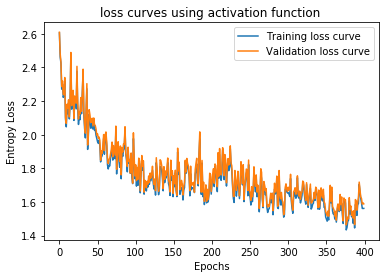

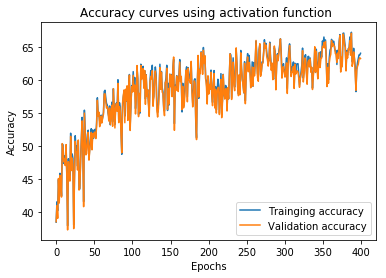

In [69]:
model = Neural_Network3(2,1296, [128,64,10])
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 400, learningRate = .1,gr_size = 150, validationX = validX, validationY = validY)

In [70]:
model.accuracy(Xtest,test_set_y)

63.53

...............................................
epoch:  0 T error:  3.3986303117473478 V error:  3.397454122822461 T acc:  33.5 V acc : 33.608333333333334
...............................................
epoch:  1 T error:  2.6639960908448903 V error:  2.6686367941895073 T acc:  41.94375 V acc : 42.13333333333333
...............................................
epoch:  2 T error:  2.383590513510929 V error:  2.3914312377771636 T acc:  46.28333333333333 V acc : 46.550000000000004
...............................................
epoch:  3 T error:  2.227629375715151 V error:  2.240710639724354 T acc:  49.425000000000004 V acc : 48.516666666666666
...............................................
epoch:  4 T error:  2.154129850079115 V error:  2.171129784201869 T acc:  50.7625 V acc : 50.68333333333334
...............................................
epoch:  5 T error:  2.0346760221543545 V error:  2.0652682978577266 T acc:  53.325 V acc : 53.075
...............................................


...............................................
epoch:  51 T error:  1.3670325381133746 V error:  1.404301272030472 T acc:  69.425 V acc : 69.00833333333334
...............................................
epoch:  52 T error:  1.3806048491713903 V error:  1.4152349696548487 T acc:  69.09166666666667 V acc : 69.1
...............................................
epoch:  53 T error:  1.3579307643570324 V error:  1.4026929444959635 T acc:  69.67083333333333 V acc : 68.84166666666667
...............................................
epoch:  54 T error:  1.348896981248857 V error:  1.3957760470682108 T acc:  69.60416666666667 V acc : 69.34166666666667
...............................................
epoch:  55 T error:  1.3629632598124655 V error:  1.4010981938364702 T acc:  69.21458333333334 V acc : 68.70833333333334
...............................................
epoch:  56 T error:  1.345820162084872 V error:  1.3855491203526984 T acc:  69.575 V acc : 68.89999999999999
........................

...............................................
epoch:  102 T error:  1.1978512112287318 V error:  1.2553816991988633 T acc:  73.25 V acc : 72.425
...............................................
epoch:  103 T error:  1.2025497670903724 V error:  1.2487692171519753 T acc:  73.21875 V acc : 72.23333333333333
...............................................
epoch:  104 T error:  1.1900109492062099 V error:  1.2377264593729507 T acc:  73.49375 V acc : 73.02499999999999
...............................................
epoch:  105 T error:  1.200636789971162 V error:  1.2304051968465048 T acc:  73.225 V acc : 73.13333333333333
...............................................
epoch:  106 T error:  1.1878185885247021 V error:  1.2291746793203033 T acc:  73.52916666666667 V acc : 72.86666666666667
...............................................
epoch:  107 T error:  1.175941516461323 V error:  1.222745575390757 T acc:  73.74166666666667 V acc : 72.98333333333333
...................................

...............................................
epoch:  152 T error:  1.0805788155515823 V error:  1.120628610788443 T acc:  76.0 V acc : 75.31666666666666
...............................................
epoch:  153 T error:  1.088100112721211 V error:  1.1295605074360835 T acc:  75.82083333333334 V acc : 75.14166666666667
...............................................
epoch:  154 T error:  1.0850002475026552 V error:  1.122868455166625 T acc:  76.08749999999999 V acc : 75.225
...............................................
epoch:  155 T error:  1.078969248467007 V error:  1.123778966132844 T acc:  76.14583333333333 V acc : 75.3
...............................................
epoch:  156 T error:  1.0897865613977076 V error:  1.1258023347726998 T acc:  75.85208333333333 V acc : 75.29166666666667
...............................................
epoch:  157 T error:  1.0988772710201216 V error:  1.1340929881255342 T acc:  75.57083333333333 V acc : 74.78333333333333
......................

...............................................
epoch:  203 T error:  1.0299987422796641 V error:  1.0656133647023605 T acc:  77.23124999999999 V acc : 76.86666666666667
...............................................
epoch:  204 T error:  1.0317144457595955 V error:  1.0843594538461019 T acc:  77.36041666666667 V acc : 75.97500000000001
...............................................
epoch:  205 T error:  1.0307952497491224 V error:  1.069862988556568 T acc:  77.45625000000001 V acc : 76.35
...............................................
epoch:  206 T error:  1.0384363904247687 V error:  1.0762109872390724 T acc:  77.21041666666667 V acc : 76.61666666666666
...............................................
epoch:  207 T error:  1.0341357830691882 V error:  1.0759584076424809 T acc:  77.02708333333334 V acc : 76.54166666666666
...............................................
epoch:  208 T error:  1.038380707731286 V error:  1.0824920080757447 T acc:  76.86041666666667 V acc : 75.966666666

...............................................
epoch:  254 T error:  0.9870774930622878 V error:  1.0317119085870314 T acc:  78.11458333333333 V acc : 77.4
...............................................
epoch:  255 T error:  0.9653813920000685 V error:  1.0176197843990094 T acc:  78.8 V acc : 77.80833333333334
...............................................
epoch:  256 T error:  0.9813650382191783 V error:  1.0292202938686659 T acc:  78.34375 V acc : 77.40833333333333
...............................................
epoch:  257 T error:  0.984765298722069 V error:  1.0233167584502663 T acc:  78.11458333333333 V acc : 77.68333333333334
...............................................
epoch:  258 T error:  0.9700955646281834 V error:  1.0246003201936258 T acc:  78.70625 V acc : 77.59166666666667
...............................................
epoch:  259 T error:  0.9668097347601218 V error:  1.0178249673108504 T acc:  78.78333333333333 V acc : 78.04166666666667
.........................

...............................................
epoch:  304 T error:  0.9377725158837344 V error:  0.9742877254660854 T acc:  79.3375 V acc : 78.725
...............................................
epoch:  305 T error:  0.9385035347464236 V error:  0.9796353491542769 T acc:  79.25416666666666 V acc : 78.61666666666667
...............................................
epoch:  306 T error:  0.9281599605621977 V error:  0.9782009835059136 T acc:  79.36875 V acc : 78.30833333333334
...............................................
epoch:  307 T error:  0.9466111715085106 V error:  0.9898032089207875 T acc:  79.08958333333334 V acc : 78.34166666666667
...............................................
epoch:  308 T error:  0.9337945771091384 V error:  0.9778269703744609 T acc:  79.32083333333333 V acc : 78.70833333333334
...............................................
epoch:  309 T error:  0.9312720971556486 V error:  0.9716419814410956 T acc:  79.46666666666667 V acc : 78.425
.....................

...............................................
epoch:  354 T error:  0.8863923704652129 V error:  0.9454777092142743 T acc:  80.45833333333333 V acc : 79.73333333333333
...............................................
epoch:  355 T error:  0.8758410074393977 V error:  0.9346791799696607 T acc:  80.76875 V acc : 79.58333333333333
...............................................
epoch:  356 T error:  0.8975029683158732 V error:  0.9515334460035427 T acc:  80.32291666666667 V acc : 79.40833333333333
...............................................
epoch:  357 T error:  0.8917039829115287 V error:  0.9454392867229041 T acc:  80.30833333333334 V acc : 79.78333333333333
...............................................
epoch:  358 T error:  0.8778480721798883 V error:  0.9392215488071562 T acc:  80.7375 V acc : 79.69166666666668
...............................................
epoch:  359 T error:  0.8808518898401904 V error:  0.933737443249737 T acc:  80.48125 V acc : 80.20833333333334
.........

D:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


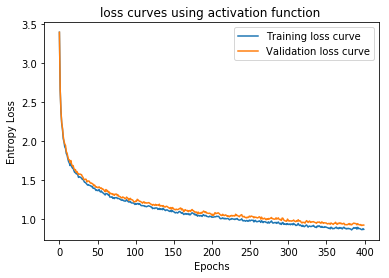

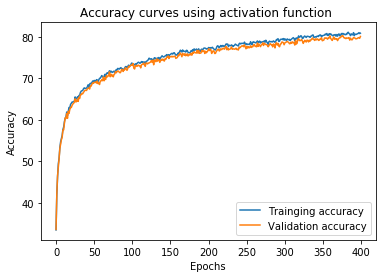

80.07

In [17]:
model = Neural_Network3(2,1296, [600,160,10])
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 400, learningRate = .01,gr_size = 150, validationX = validX, validationY = validY)
model.accuracy(Xtest,test_set_y)

In [18]:
model.saveModel('s')

saving model
model saved..


In [19]:
mm = Neural_Network3()
# load model which will be provided by you
mm.loadModel('s')
# check accuracy of that model
mm.accuracy(Xtest,test_set_y)

80.0